In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
df = pd.read_csv("complex_data.csv")

In [5]:
df

,model,num_params,acc,num_params_log
0,Logistic Regression,1552,22.22,3.190892
1,CNN,697344,13.19,5.843447
2,Transformer,6152,15.28,3.789016
3,DenseNet,18108296,73.61,7.257878
4,ResNet,23524424,76.39,7.371519
5,Issa et al.,501912,75.69,5.700628
6,DesNet ++,20588936,79.17,7.313634
7,ResNet ++,26135112,74.31,7.417224
8,MultiNet,107697640,77.78,8.032206


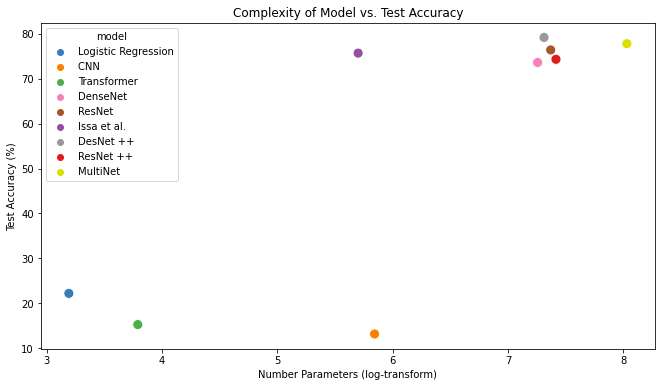

In [72]:
plt.figure(figsize=(11,6));
plt.xlabel("Number Parameters (log-transform)");
plt.ylabel("Test Accuracy (%)");
plt.title("Complexity of Model vs. Test Accuracy");



# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y']-2, str(point['val']))

# label_point(df.num_params_log, df.acc, df.model, plt.gca());


sns.scatterplot(data=df, x='num_params_log', y='acc', hue='model', s=100);

In [32]:
df_g = pd.read_csv("gender.csv")

In [34]:
df_g['gender'] = -1

In [41]:
df_w = df_g[['Model', 'test_acc_w', 'test_loss_w']]

In [43]:
df_w['gender'].values[:] = 0

In [44]:
df_w

,Model,test_acc_w,test_loss_w,gender
0,Logistic Regression,22.86,8.51,0
1,CNN,15.07,2.09,0
2,Transformer,16.44,2.10,0
3,DenseNet,78.08,0.85,0
4,ResNet,86.30,0.45,0
5,Issa et al.,80.82,0.82,0
6,DesNet ++,83.56,0.69,0
7,ResNet ++,84.93,0.60,0
8,MultiNet,82.19,0.55,0
9,avg,61.14,1.85,0


In [47]:
df_m = df_g[['Model', 'test_acc_m', 'test_loss_m']]

In [48]:
df_m['gender']= 1

/home/emily2h/anaconda3/envs/local_nmt/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_m.columns = ['Model', 'test_acc', 'test_loss', 'gender']
df_w.columns = ['Model', 'test_acc', 'test_loss', 'gender']

In [56]:
gender_map = {-1:'All', 0:'W', 1:'M'}

In [51]:
df_g = df_g[['Model', 'test_acc', 'test_loss', 'gender']]

In [52]:
df_new = pd.concat([df_g, df_m, df_w])

In [57]:
df_new['gender'] = df_new['gender'].map(gender_map)

Text(0, 0.5, 'Test Accuracy (%)')

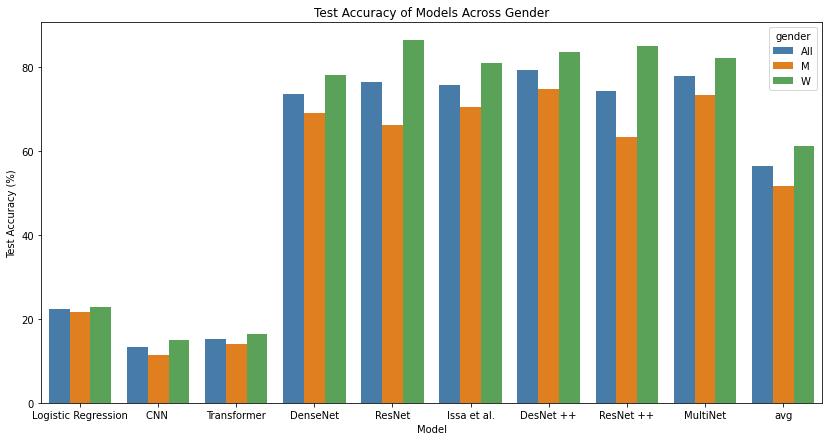

In [71]:
plt.figure(figsize=(14,7))
plt.title("Test Accuracy of Models Across Gender")

# Create an array with the colors you want to use
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=df_new, x='Model', y='test_acc', hue='gender')
plt.ylabel("Test Accuracy (%)")
